In [1]:
# import packages
import numpy as np
from datascience import *

# import plotting packages
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# import pandas as pd

# Hypothesis Testing

## How to do a Hypothesis Test

1. **Before computing anything**: figure out the viewpoint the question wants to test, and formulate:
    * **Null hypothesis**: Completely specified chance model under which you can simulate data. (e.g. "The coin is fair.")
    * **Alternative hypothesis**: Viewpoint from the question (e.g. "No, The coin is NOT fair." or "No, it’s biased toward heads.")
    * **Test statistic**: to help you choose one viewpoint
    * **Define P-value cutoff** 


2. Compute the value of the test statistic in your data
    * Test statistic is often (but not always) the difference or absolute difference between group means.


3. Simulate the test statistic under the null many times
    * Usually will store those values in an array.


4. Compare the results
    * Observed test statistic and its empirical distribution under the null hypothesis.


5. Draw a conclusion
    * Comparing the P-value to the P-value cutoff

## Hypothesis Testing (Distribution)

- **One** Sample: One Category (e.g. percent of flowers that are purple)
    * Test Statistic: 
        * empirical_percent,
        * abs(empirical_percent - null_percent)
    * How to Simulate: sample_proportions(n, null_dist)


- **One** Sample: More Than 2 Categories (e.g. ethnicity distribution of jury panel)
    * Test Statistic: tvd(empirical_dist, null_dist)
    * How to Simulate: sample_proportions(n, null_dist)


- **One** Sample: Numerical Data (e.g. scores in a lab section)
    * Test Statistic: 
        * empirical_mean,
        * abs(empirical_mean - null_mean)
    * How to Simulate: population_data.sample(n, with_replacement=False)


- **Two** Samples: Underlying Values (e.g. birth weights of smokers vs. non-smokers) 
     = **A/B Testing**
    * Test Statistic: 
        * group_a_mean - group_b_mean,
        * group_b_mean - group_a_mean, 
        * abs(group_a_mean - group_b_mean)
    * How to Simulate: empirical_data.sample(with_replacement=False)

## Definition of the p-value
Formal name: **observed significance level**

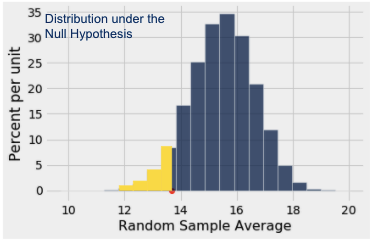

The p-value is the chance (probability):
- under the null hypothesis, (the histogram)
- that the test statistic (the red dot)
- is equal to the value that was observed in the data or is even further in the direction of the alternative. (the yellow area)
    * Last two bullets mean: “test statistic is **at least as extreme as** the observed value.”

## Appendix - Conventions About Inconsistency
- “Inconsistent with the null”: The **test statistic** is in the tail of the empirical distribution (under the null hypothesis)
    * The farther out in the tail the test statistic lies, the more inconsistent it is with the null hypothesis
- “In the tail,” first convention:
    * The area in the tail is less than **5%**
    * The result is **“statistically significant”**
- “In the tail,” second convention:
    * The area in the tail is less than **1%**
    * The result is **“highly statistically significant”**
    
## Appendix - Plotting (Distribution)

- Compare numerical vs categorical: 
    * Two histograms, overlaid (weight vs mom/father/child)
- Compare numerical vs numerical (continues variables): 
    * A scatter plot
- Compare categorical vs categorical:
    * A bar chat

# Hypothesis Testing Example
## --- One Sample: One Category ---
## ★ Mendel and Pea Flowers

## A Genetic Model (Gregor Mendel, 1822-1884)
- Pea plants of a particular kind
- Each one has either purple flowers or white flowers
- Mendel’s model:
    * Each plant is purple-flowering with chance 75%,
    * regardless of the colors of the other plants


**Question: Is the model good, or not?**

### Step 1: Define viewpoint the question wants to test
- Null hypothesis: Each plant has a 75% chance of having purple flowers
- Alternative hypothesis: No, it doesn’t
- Test statistic: One Category, use empirical percentage.
- P-value cutoff = 5%

### Step 2: Compute the value of the test statistic

In [2]:
## Mendel had 929 plants, of which 709 had purple flowers
empirical_percent = 709 / 929
empirical_percent

0.7631862217438106

### Step 3: Simulate the test statistic under the null many times

In [3]:
model_proportions = make_array(.75, .25)

# testing
sample_proportions(929, model_proportions)

array([ 0.75026911,  0.24973089])

In [4]:
# Simulate the test statistic under the null 10,000 times
purples = make_array()

num_simulations = 10000
for i in np.arange(num_simulations):
    new_purple = sample_proportions(929, model_proportions).item(0)*100
    purples = np.append(purples, new_purple)

### Step 4: Compare the results

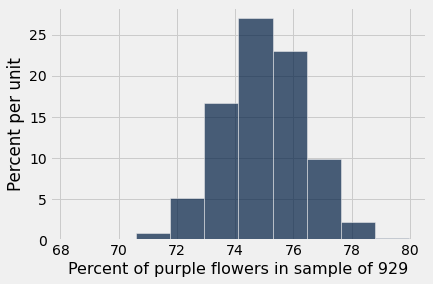

In [5]:
Table().with_column('Percent of purple flowers in sample of 929', purples).hist()

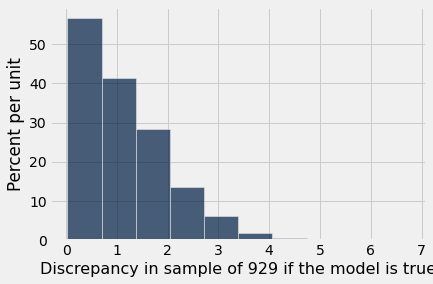

In [6]:
Table().with_column('Discrepancy in sample of 929 if the model is true', abs(purples- 75)).hist()

In [7]:
observed_percent = abs(empirical_percent * 100 - 75)
observed_percent

1.318622174381062

Observed percent: 1.318622174381062


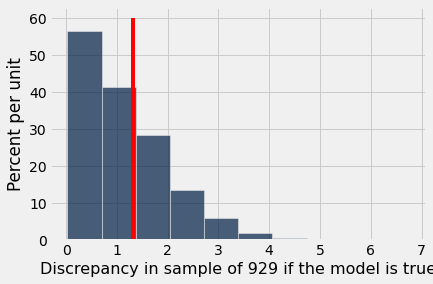

In [8]:
Table().with_column('Discrepancy in sample of 929 if the model is true', abs(purples- 75)).hist()
plots.plot([observed_percent,observed_percent], [0,0.6], color='red', lw=4)
print('Observed percent: ' + str(observed_percent))

### Step 5 Draw a conclusion
**Fail to reject the null hypothesis**. The evidence is **not sufficient** to **reject** the claim

Conclusion reference table
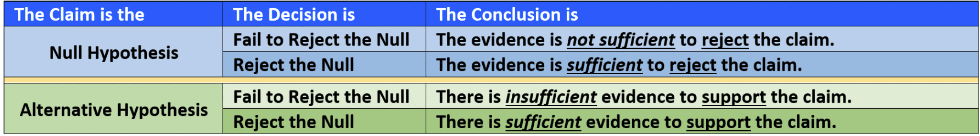

## --- One Sample: More Than 2 Categories ---
## ★ Alameda County Jury Panels

## Study: ACLU of Northern California report, 2010 
Racial and Ethnic Disparities in Alameda County Jury Pools
- Section 197 of California's Code of Civil Procedure:
    * "All persons selected for jury service shall be selected at random, from a source or sources inclusive of a representative cross section of the population of the area served by the court.”

- The study: 
    * 11 trials in the Alameda County Superior Court
    * Total of 1453 panelists
    * The study compared the distribution of ethnicities of:
        * Eligible jurors
        * Panelists
    * Ethnicity had multiple categories
    
**Question: Is the jury really representative of the population cross-section of the area served by the court, or not?**

### Step 1: Define viewpoint the question wants to test

- Null Hypothesis: The distribution of ethnicities of the Jury Panels is equal to eligible jurors probabilities. Any difference is due to chance alone. 
 
- Alternative Hypothesis: The difference is not due to chance - the Jury Panels are not distributed according to eligible jurors probabilities, with some ethnicities being more prevalent than others.

- Test statistic: Multiple Category, use Total Variation Distance (TVD).

- P-value cutoff = 5%

In [9]:
jury = Table().with_columns(
    'Ethnicity', make_array('Asian', 'Black', 'Latino', 'White', 'Other'),
    'Eligible', make_array(0.15, 0.18, 0.12, 0.54, 0.01),
    'Panels', make_array(0.26, 0.08, 0.08, 0.54, 0.04)
)

jury

Ethnicity,Eligible,Panels
Asian,0.15,0.26
Black,0.18,0.08
Latino,0.12,0.08
White,0.54,0.54
Other,0.01,0.04


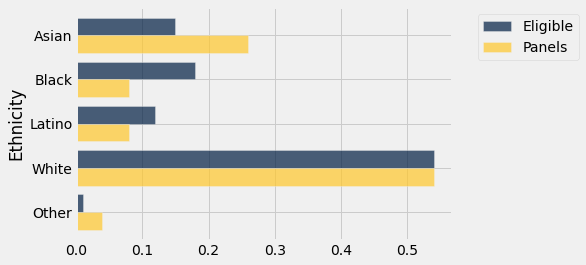

In [10]:
jury.barh('Ethnicity')

### Step 2: Compute the value of the test statistic

In [11]:
# Under the model, this is the true distribution of people
# from which the jurors are randomly sampled
model = make_array(0.15, 0.18, 0.12, 0.54, 0.01)

In [12]:
# Let's simulate a random draw of 1423 jurors from this distribution
simulated = sample_proportions(1423, model)
simulated

array([ 0.14054814,  0.17076599,  0.12789881,  0.5544624 ,  0.00632467])

In [13]:
# The actual observed distribution (Panels) looks quite different
# from the simulation -- try running this several times to confirm!
jury_with_simulated = jury.with_column('Simulated', simulated)
jury_with_simulated

Ethnicity,Eligible,Panels,Simulated
Asian,0.15,0.26,0.140548
Black,0.18,0.08,0.170766
Latino,0.12,0.08,0.127899
White,0.54,0.54,0.554462
Other,0.01,0.04,0.00632467


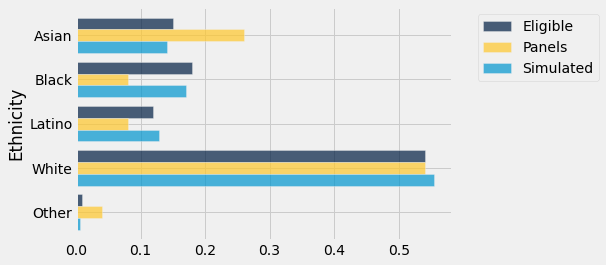

In [14]:
jury_with_simulated.barh('Ethnicity')

#### Distance Between Distributions

In [15]:
# we need to understand how each of the 5 categories
# differ from their expected values according to the model.

difference = jury.column('Panels') - jury.column('Eligible')
jury_with_difference = jury.with_column('Difference', difference)
jury_with_difference

Ethnicity,Eligible,Panels,Difference
Asian,0.15,0.26,0.11
Black,0.18,0.08,-0.1
Latino,0.12,0.08,-0.04
White,0.54,0.54,0
Other,0.01,0.04,0.03


#### Total Variation Distance

In [16]:
def tvd(dist1, dist2):
    return sum(abs(dist1 - dist2))/2

In [17]:
# The TVD of our observed data (Panels) from their expected values
# assuming the model is true (Eligbible)
observed_tvd = tvd(jury.column('Panels'), jury.column('Eligible'))
observed_tvd

0.14000000000000001

In [18]:
# The TVD of a model simluation from its expected values
tvd(sample_proportions(1423, model), jury.column('Eligible'))

0.018025298664792719

### Step 3: Simulate the test statistic under the null many times

In [19]:
def simulated_tvd():
    return tvd(sample_proportions(1423, model), model)

tvds = make_array()

num_simulations = 10000
for i in np.arange(num_simulations):
    new_tvd = simulated_tvd()
    tvds = np.append(tvds, new_tvd)

### Step 4: Compare the results

Observed TVD: 0.14


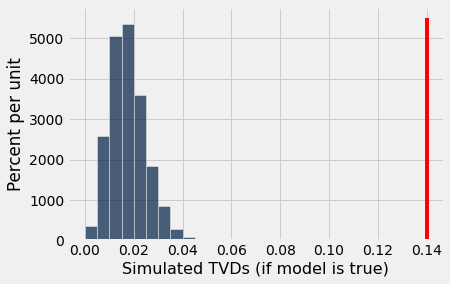

In [20]:
title = 'Simulated TVDs (if model is true)'
bins = np.arange(0, .05, .005)

Table().with_column(title, tvds).hist(bins = bins)
plots.plot([observed_tvd,observed_tvd], [0,55], color='red', lw=4)
print('Observed TVD: ' + str(observed_tvd))

### Step 5 Draw a conclusion
**Reject the null hypothesis**. The evidence is **sufficient** to **reject** the claim

## --- One Sample: Numerical Data ---
## ★ The GSI's Defense

- Large(ish) Statistics class divided into 12 discussion sections
- Graduate Student Instructors (GSIs) lead the sections
- After midterm, students in Sec. 3 notice average score in their section lower than in others! 

**Question: Is the Sec. 3 score too low, or it is just randomness?**

### Step 1: Define viewpoint the question wants to test

- Null Hypothesis (Sec. 3 GSI Position): Had we picked my section at random from the whole class, we could’ve gotten an average like this one.
 
- Alternative Hypothesis: No! Sec. 3’s average score too low. Randomness not the only reason for lower scores.

- Test statistic: Numerical Data, use empirical mean.

- **P-value cutoff = 5%**

In [21]:
scores = Table.read_table('scores_by_section.csv')
scores.show(5)

Section,Midterm
1,22
2,12
2,23
2,14
1,20


In [22]:
scores.group('Section').show(5)

Section,count
1,32
2,32
3,27
4,30
5,33


In [23]:
scores.group('Section', np.average).show()

Section,Midterm average
1,15.5938
2,15.125
3,13.6667
4,14.7667
5,17.4545
6,15.0312
7,16.625
8,16.3103
9,14.5667
10,15.2353


In [24]:
observed_average = 13.6667 

In [25]:
random_sample = scores.sample(27, with_replacement=False)
random_sample

Section,Midterm
2,11
3,18
7,10
2,17
1,20
2,5
12,10
1,15
7,21
9,11


In [26]:
np.average(random_sample.column('Midterm'))

13.814814814814815

### Step 2: Compute the value of the test statistic

In [27]:
# Simulate one value of the test statistic 
# under the hypothesis that the section is like a random sample from the class

def random_sample_midterm_avg():
    random_sample = scores.sample(27, with_replacement = False)
    return np.average(random_sample.column('Midterm'))

### Step 3: Simulate the test statistic under the null many times

In [28]:
# Simulate 50,000 copies of the test statistic
num_simulation = 50000
sample_averages = make_array()

for i in np.arange(num_simulation):
    sample_averages = np.append(sample_averages, random_sample_midterm_avg())    

### Step 4: Compare the results

Observed average: 13.6667


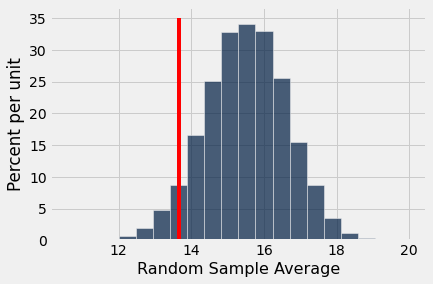

In [29]:
# Compare the simulated distribution of the statistic
# and the actual observed statistic

averages_tbl = Table().with_column('Random Sample Average', sample_averages)
averages_tbl.hist(bins = 20)
plots.plot([observed_average,observed_average], [0,0.35], color='red', lw=4)
# plots.scatter(observed_average, 0, color = 'red', s=40)
print('Observed average: ' + str(observed_average))

### Step 5. Draw a conclusion

Question: Does Sec.3's average (red line) seems very different from the rest of the sections?

In [30]:
averages_visualization = averages_tbl.with_column('observed_average', observed_average)
averages_visualization.show(5)

Random Sample Average,observed_average
14,13.6667
15.8889,13.6667
15.8519,13.6667
18,13.6667
13.7778,13.6667


In [31]:
# How many of our sample averages (simulated) are less than,
# or equal to, the observed average
# divided by total number of samples(trials) 

tail_probability = sum(sample_averages <= observed_average) / num_simulation
tail_probability

0.056320000000000002

- Tail probability is also called the p-value
- It is the probability of obtaining results that is **at least as extreme as** the observed value


- P-value (the simulation area beyond observed value) is **NOT** less than 5%. (it is 5.X%)
- So, the GSI's assertion is supported by the data. 

#### Where is the 5% cutoff?
Another way to view:
Basically grab the boundary value **beyond** which the tail probability < 0.05 (5%)

In [32]:
five_percent_point = averages_tbl.sort(0).column(0).item(int(num_simulation*0.05))
five_percent_point

13.62962962962963

Observed average: 13.6667
P-value cutoff(5%): 13.62962962962963


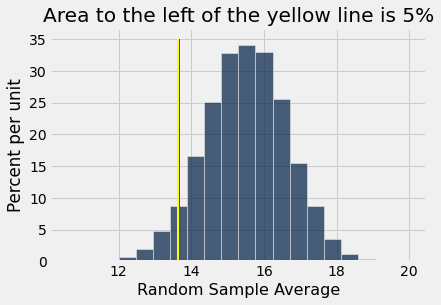

In [33]:
averages_tbl.hist(bins = 20)
plots.plot([observed_average,observed_average], [0,0.35], color='red', lw=2)
plots.plot([five_percent_point,five_percent_point], [0,0.35], color='yellow', lw=2)

plots.title("Area to the left of the yellow line is 5%")

print('Observed average: ' + str(observed_average))
print('P-value cutoff(5%): ' + str(five_percent_point))

It was close, but the GSI WINS by scraping by!

**Fail to reject the null hypothesis**. The evidence is **not sufficient** to **reject** the claim

## --- Two Samples: Underlying Values (A/B Testing) ---
Question: Do the two sets of values come from the same underlying distribution?

## ★ Whether smoking moms have lighter weight babies?

The Groups and the Question
- Random sample of mothers of newborns. Compare:
    * (A) Birth weights of babies of mothers who smoked during pregnancy 
    * (B) Birth weights of babies of mothers who didn’t smoke

**Question: Could the difference be due to chance alone?**

### Step 1: Define viewpoint the question wants to test

- Null Hypothesis: In the population, the distributions of the birth weights of the babies in the two groups are the same. (They are different in the sample just due to chance.)


- Alternative Hypothesis: In the population, the babies of the mothers who smoked weigh less, on average, than the babies of the non-smokers.


- Test statistic: Do the two sets of values come from the same underlying distribution? It is often (but not always) the difference or absolute difference between group means.


- P-value cutoff = 1%

In [34]:
births = Table.read_table('baby.csv')
births.show(5)

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False


In [35]:
# Selected only the columns that we need

smoking_and_birthweight = births.select('Maternal Smoker', 'Birth Weight')

In [36]:
smoking_and_birthweight.group('Maternal Smoker')

Maternal Smoker,count
False,715
True,459


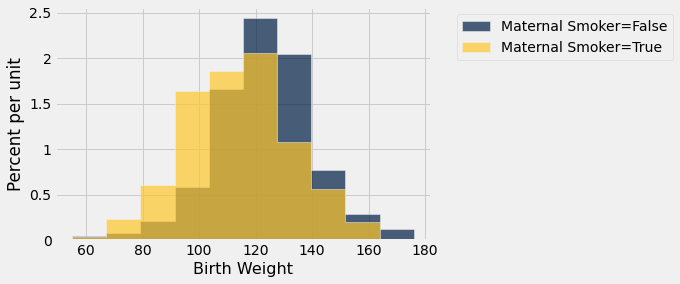

In [37]:
smoking_and_birthweight.hist('Birth Weight', group='Maternal Smoker')

### Step 2: Compute the value of the test statistic
#### Test statistic
- Group A : non-smokers 
- Group B : smokers
- Statistic : Difference between average weights 
    * Group B average - Group A average


- Negative values of this statistic favor the alternative
    * Negative values = smokers average is larger than non-smokers
    * favor the alternative (there is no different bewteen two group of babies)

In [38]:
# What's the average of each group?
means_table = smoking_and_birthweight.group('Maternal Smoker', np.average)
means_table

Maternal Smoker,Birth Weight average
False,123.085
True,113.819


In [39]:
means = means_table.column(1)
observed_difference = means.item(1) - means.item(0)
observed_difference

-9.266142572024918

In [40]:
# although we it is pretty clear that there is a difference, 
# but we need proof that it is not the same distribution

# To start from the beginning, we definite a function that take in 
# the original table with needed columns

def difference_of_means(table, label, group_label):
    """ Takes: name of table, column label of numerical variable,
    column label of group-label variable
    Returns: Difference of means of the two groups """
    
    #table with the two relevant columns
    reduced = table.select(label, group_label)  
    
    # table containing group means
    means_table = reduced.group(group_label, np.average)
    # array of group means
    means = means_table.column(1)
    
    return means.item(1) - means.item(0)

In [41]:
# testing
difference_of_means(births, 'Birth Weight', 'Maternal Smoker')

-9.266142572024918

### Step 3: Simulate the test statistic under the null many times
#### Random Permutation (Shuffling)

In [42]:
shuffled_labels = smoking_and_birthweight.sample(with_replacement=False).column('Maternal Smoker')

In [43]:
# we definite a function that take in the original table with needed columns and suffled the labels

def one_simulated_difference(table, label, group_label):
    """Takes: name of table, column label of numerical variable,
    column label of group-label variable
    Returns: Difference of means of the two groups after shuffling labels"""
    
    # array of shuffled labels
    shuffled_labels = table.sample(with_replacement = False).column(group_label)
    
    # table of numerical variable and shuffled labels
    shuffled_table = table.select(label).with_column(
    'Shuffled Label', shuffled_labels)
    
    return difference_of_means(shuffled_table, label, 'Shuffled Label')   

In [44]:
one_simulated_difference(births, 'Birth Weight', 'Maternal Smoker')

0.18853085911909773

In [46]:
# Large scale simulation
differences = make_array()

num_simulation = 2500
for i in np.arange(num_simulation):
    new_difference = one_simulated_difference(births, 'Birth Weight', 'Maternal Smoker')
    differences = np.append(differences, new_difference)

### Step 4: Compare the results

Observed Difference: -9.266142572024918


Text(0.5, 1.0, 'Prediction Under the Null Hypothesis')

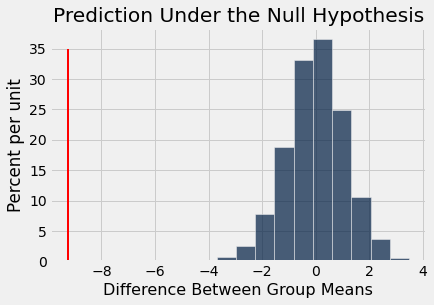

In [47]:
# Make a histogram and visualize the result
Table().with_column('Difference Between Group Means', differences).hist()
plots.plot([observed_difference,observed_difference], [0,0.35], color='red', lw=2)


print('Observed Difference:', observed_difference)

plots.title('Prediction Under the Null Hypothesis')

### Step 5. Draw a conclusion

In [48]:
p_value = np.count_nonzero(differences <= observed_difference)/len(differences)
p_value

0.0

Note: the probability of getting -9 is not going to 0, it is going to really really really small

compare this to a 1% p-value cutoff:

Reject the null hypothesis. The evidence is sufficient to reject the claim